In [1]:
import mbuild as mb
from genGrouper.group_graph import GroupGraph
from genGrouper.generate import generate_group_graph_space
from rdkit import Chem
import networkx as nx
from networkx.utils import graphs_equal
from pysmiles import read_smiles, write_smiles
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from group_selfies import Group
import rdkit

/Users/kieran/miniconda3/envs/genGrouper/lib/python3.9/site-packages/mdtraj/geometry/order.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version
/Users/kieran/miniconda3/envs/genGrouper/lib/python3.9/site-packages/pkg_resources/__init__.py:2846: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/Users/kieran/miniconda3/envs/genGrouper/lib/python3.9/site-packages/pkg_resources/__init__.py:2846: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https:

# ECO-AI

In [2]:
# Thomas suggestions [9:33 AM] Bernet, Thomas
# CH3
# CH2
# CH
# C
# CH2OH
# NH2
# Chirality test for CH and C
# Conditions: 1 N, at least 1 O



fragments = [
    Group('hydroxl', 'O[H]', all_attachment=True), #OH
    Group('carbon_1111', 'C(*1)(*1)(*1)(*1)'), 
    # Group('carbon_112', 'C(*1)(*1)(*2)'), 
    # Group('carbon_22', 'C(*2)(*2)'), 
    # Group('carbon_13', 'C(*1)(*3)'), 
    Group('methine_3', 'C([H])', all_attachment=True), #CH
    # Group('methine_12', 'C([H])(*2)(*1)'),
    Group('methine_111', 'C([H])(*1)(*1)(*1)'), 
    # Group('methylene_2', 'C([H])([H])(*2)'), #CH2
    Group('methylene_11', 'C([H])([H])(*1)(*1)'), 
    Group('methyl_1', 'C([H])([H])[H]', all_attachment=True), #CH3
    # Group('amine0_2', 'N(C([H])([H]))(*2)'), #NCH2
    Group('amine0_11', 'N(C([H])([H]))(*1)(*1)'), 
    # Group('amine1_2', 'N(C([H])([H])[H])(*2)') , #NCH3
    Group('amine1_11', 'N(C([H])([H])[H])(*1)(*1)'), 
    Group('amine2_12', 'N(C[H])[H]', all_attachment=True), #NHCH
    Group('amine2_11_1', 'N(*1)(C([H])(*1)(*1))[H]'), 
    Group('amine3_1_1', 'C(N[H])([H])[H]', all_attachment=True), #NHCH2
    Group('amine3', '*1N(C([H])([H])[H])[H]'), #NHCH3
    Group('amine4_3', 'C(*3)(N([H])[H])'), #NH2C
    Group('amin4_12', 'C(*2)(*1)(N([H])[H])'), 
    Group('amine4_111', 'C(*1)(*1)(*1)(N([H])[H])'), 
    Group('amine5_2', '*2C(N([H])[H])[H]'), #NH2CH
    Group('amine5_11', 'C(*1)(*1)(N([H])[H])[H]'),
    Group('amine6_1', '*1C(N([H])[H])([H])[H]'),#NH2CH2
]
node_types = {
    'OH': ['O1'],
    'carbon_1111': ['C1', 'C2', 'C3', 'C4'],
    # 'carbon_112': ['C1', 'C2', 'C3'],
    # 'carbon_22': ['C1', 'C2'],
    # 'methine_3': ['C1'],
    # 'methine_12': ['C1', 'C2'],
    'methine_111': ['C1', 'C2', 'C3'],
    # 'methylene_2': ['C1',],
    'methylene_11': ['C1', 'C2'],
    'methyl_1': ['C1'],
    # 'amine0_2': ['N1'],
    'amine0_11': ['N1', 'N2'],
    # 'amine1_2': ['N1'],
    'amine1_11': ['N1', 'N2'],
    # 'amine2_12': ['N1', 'C1'],
    'amine2_11_1': ['N1', 'C1', 'C2'],
    'amine3_1_1': ['N1', 'C1'],
    'amine3': ['N1'],
    # 'amine4_3': ['C1'],
}

# node_type_to_smiles = {
#     'OH' : Chem.MolToSmiles(Group('OH', 'O[H]', all_attachment=True).mol),
#     'carbon_1111': Chem.MolToSmiles(Group('carbon_1111', 'C(*1)(*1)(*1)(*1)').mol),
#     # 'carbon_112': Chem.MolToSmiles(Group('carbon_112', 'C(*1)(*1)(*2)').mol),
#     # 'carbon_22': Chem.MolToSmiles(Group('carbon_22', 'C(*2)(*2)').mol),
#     # 'methine_3': Chem.MolToSmiles(Group('methine_3', 'C([H])', all_attachment=True).mol),
#     # 'methine_12': Chem.MolToSmiles(Group('methine_12', 'C([H])(*2)(*1)').mol),
#     'methine_111': Chem.MolToSmiles(Group('methine_111', 'C([H])(*1)(*1)(*1)').mol),
#     # 'methylene_2': Chem.MolToSmiles(Group('methylene_2', 'C([H])([H])(*2)').mol),
#     'methylene_11': Chem.MolToSmiles(Group('methylene_11', 'C([H])([H])(*1)(*1)').mol),
#     'methyl_1': Chem.MolToSmiles(Group('methyl_1', 'C([H])([H])[H]', all_attachment=True).mol),
#     # 'amine0_2': Chem.MolToSmiles(Group('amine0_2', 'N(C([H])([H]))(*2)').mol),
#     'amine0_11': Chem.MolToSmiles(Group('amine0_11', 'N(C([H])([H]))(*1)(*1)').mol),
#     # 'amine1_2': Chem.MolToSmiles(Group('amine1_2', 'N(C([H])([H])[H])(*2)').mol),
#     'amine1_11': Chem.MolToSmiles(Group('amine1_11', 'N(C([H])([H])[H])(*1)(*1)').mol),
#     # 'amine2_12': Chem.MolToSmiles(Group('amine2_12', 'N(C[H])[H]', all_attachment=True).mol),
#     'amine2_11_1': Chem.MolToSmiles(Group('amine2_11_1', 'N(*1)(C([H])(*1)(*1))[H]').mol),
#     'amine3_1_1': Chem.MolToSmiles(Group('amine3_1_1', 'C(N[H])([H])[H]', all_attachment=True).mol),
#     'amine3': Chem.MolToSmiles(Group('amine3', '*1N(C([H])([H])[H])[H]').mol),
#     # 'amine4_3': Chem.MolToSmiles(Group('amine4_3', 'C(*3)(N([H])[H])').mol),
# }
node_type_to_smiles = {
    'OH' : 'O',
    'carbon_1111': 'C',
    'methine_111': 'C',
    'methylene_11': 'C',
    'methyl_1': 'C',
    'amine0_11': 'CN',
    'amine1_11': 'CN',
    'amine2_11_1': 'CN',
    'amine3_1_1': 'CN',
    'amine3': 'CN',
}
node_port_to_atom_index = {
    'OH' : {'O1': 0},
    'carbon_1111': {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0},
    # 'carbon_112': {'C1': 1, 'C2': 1, 'C3': 1},
    # 'carbon_22': {'C1': 1, 'C2': 1},
    # 'methine_3': {'C1': 1},
    # 'methine_12': {'C1': 1, 'C2': 1},
    'methine_111': {'C1': 0, 'C2': 0, 'C3': 0},
    # 'methylene_2': {'C1': 1},
    'methylene_11': {'C1': 0, 'C2': 0},
    'methyl_1': {'C1': 0},
    # 'amine0_2': {'N1': 1},
    'amine0_11': {'N1': 1, 'N2': 1},
    # 'amine1_2': {'N1': 1},
    'amine1_11': {'N1': 1, 'N2': 1},
    # 'amine2_12': {'N1': 1, 'C1': 2},
    'amine2_11_1': {'N1': 1, 'C1': 0, 'C2': 0},
    'amine3_1_1': {'N1': 1, 'C1': 0},
    'amine3': {'N1': 1},
    # 'amine4_3': {'C1': 1},
}

In [51]:
def check_atom_index_matches(smiles, atom_indexs):
    mol = read_smiles(smiles)
    for atom, index in atom_indexs.items():
        if 'element' not in mol.nodes[index]:
            print('Error: element not in node')
            return False
        if mol.nodes[index]['element'] != atom[0]:
            return False
    return True

for nt, ns, na in zip(node_types, node_type_to_smiles, node_port_to_atom_index):
    if set(node_types[nt]) != set(node_port_to_atom_index[na].keys()):
        print('Error: node_types and node_type_to_atom_index do not match')
        break
    # if write_smiles(node_type_to_smiles[ns]) != writeChem.MolToSmiles(f.mol):
    #     print('Error: node_type_to_smiles and mol do not match')
    #     print(Chem.MolToSmiles(f.mol))
    #     print(node_type_to_smiles[ns])
    #     break
    # print(node_type_to_smiles[ns], node_port_to_atom_index[na])
    if not check_atom_index_matches(node_type_to_smiles[ns], node_port_to_atom_index[na]):
        print('Error: atom index does not match')
        print(nt)
        print(node_types[nt])
        print(node_type_to_smiles[ns]) 
        print(node_port_to_atom_index[na])
        print(read_smiles(node_type_to_smiles[ns]).nodes(data='element'))
        break


In [47]:
fragments = [
    Group('s1', 'C([F])([F])([F])(*1)'),   # single connection
    # Group('s2', 'C(#N)(*1)'), 
    # Group('s3', 'OS(*1)(=O)=O'),
    # Group('d1', 'C(O)=O', all_attachment=True),  # double connection
    Group('d2', 'O(*1)(*1)'),
    Group('d3', 'C(*1)(*1)=O'), 
    Group('c', 'C(*1)(*1)CC(*1)(*1)'),
    Group('d4', 'C(*1)(*1)([F])([F])'), 
    Group('d5', 'C(*1)(*3)'), 
    Group('d6', 'C([H])([H])(*1)(*1)'),
    Group('t1', 'N(*1)(*1)(*1)'), # triple connection
    Group('q1', 'C(*1)(*1)(*1)(*1)'), # quadruple connection
    Group('q2', 'C(*1)(*1)=C(*1)(*1)'), 
    Group('r1', 'C1=CC=CC=C1', all_attachment=True), # ring conneciton
    # Group('r2', 'C1=CNC=C1', all_attachment=True), 
    # Group('r3', 'C1(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C1(*1)(*1)'),
    Group('base', '[K][C](*1)([H])[H]') # base group
    
]
node_types = {
    's1' : ['C1'],
    # 's2' : ['C1'],
    # 's3' : ['O1'],
    # 'd1' : ['C1', 'O1'],
    'c' : ['C1', 'C2', 'C3', 'C4'],
    'd2' : ['O1', 'O2'],
    'd3' : ['C1', 'O1'],
    'd4' : ['C1', 'C2'],
    'd5' : ['C1', 'C2'],
    'd6' : ['C1', 'C2'],
    't1' : ['N1', 'N2', 'N3'],
    'q1' : ['C1', 'C2', 'C3', 'C4'],
    'q2' : ['C11', 'C12', 'C21', 'C22'],
    'r1' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], # benzene double bonded ring
    # 'r2' : ['C1', 'C2', 'C3', 'C4', 'N1'],
    # 'r3' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'], # benzene single bonded ring
    'base': ['C1']

}
node_type_to_smiles = {
    's1' : 'C',
    # 's2' : 'C#N',
    # 's3' : 'OS(=O)=O',
    # 'd1' : 'C(=O)O',
    'c' : 'C',
    'd2' : 'O',
    'd3' : 'C=O',
    'd4' : 'C(F)(F)',
    'd5' : 'C',
    'd6' : 'C',
    't1' : 'N',
    'q1' : 'C',
    'q2' : 'C=C',
    # 'r1' : 'c1ccccc1',
    'r1' : 'C1=CC=CC=C1',
    # 'r2' : 'C1=CNC=C1',
    # 'r3' : 'C1CCCCC1',
    'base': '[K][C]([H])[H]',
}
node_port_to_atom_index = {
    's1' : {'C1':    0},
    # 's2' : {'C1': 0},
    # 's3' : {'O1': 0},
    # 'd1' : {'C1': 0, 'O1': 0},
    'd2' : {'O1': 0, 'O2': 0},
    'd3' : {'C1': 0, 'O1': 0},
    'd4' : {'C1': 0, 'C2': 0},
    'd5' : {'C1': 0, 'C2': 0},
    'd6' : {'C1': 0, 'C2': 0},
    't1' : {'N1': 0, 'N2': 0, 'N3': 0},
    'q1' : {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0},
    'q2' : {'C11': 0, 'C12': 0, 'C21': 1, 'C22': 1},
    'r1' : {'C1': 0, 'C2': 1, 'C3': 2, 'C4': 3, 'C5': 4, 'C6': 5},
    # 'r2' : {'C1': 0, 'C2': 1, 'C3': 2, 'C4': 3, 'N1': 4},
    # 'r3' : {'C1': 0, 'C2': 0, 'C3': 1, 'C4': 1, 'C5': 2, 'C6': 2, 'C7': 3, 'C8': 3, 'C9': 4, 'C10': 4, 'C11': 5, 'C12': 5},
    'c': {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0},
    'base': {'C1': 1}
}
graph = GroupGraph(node_types)

In [6]:
out = generate_group_graph_space(4, node_types)

>A /Users/kieran/projects/genGrouper/genGrouper/../packages/nauty2_8_8/geng -ctfd1D3 n=4 e=3
>Z 2 graphs generated in 0.00 sec
>A vcolg -m10T geng_out.txt vcolg_out.txt
>Z 2 graphs read from geng_out.txt; 7250 coloured graphs written to vcolg_out.txt; 0.00 sec
>A multig -m16VT vcolg_out.txt multig_out.txt
>Z 7250 graphs read from vcolg_out.txt; 27448000 multigraphs written to multig_out.txt; 2.99 sec


In [7]:
unique_mols = set()
groupGraphs = []
for g in out:
    mG = g.to_molecular_graph(node_type_to_smiles, node_port_to_atom_index)
    if Chem.MolFromSmiles(write_smiles(mG)) is not None:
        canon = Chem.MolToSmiles(Chem.MolFromSmiles(write_smiles(mG)), canonical=True)
        if canon in unique_mols:
            continue
        unique_mols.add(canon)
        groupGraphs.append(g)
    else:
        print("Rdkit failed from conversion between smiles and molecular graph")
        print(g)
        break
print(f"Unique: {len(unique_mols)}, Total: {len(out)}")

Unique: 233, Total: 281052


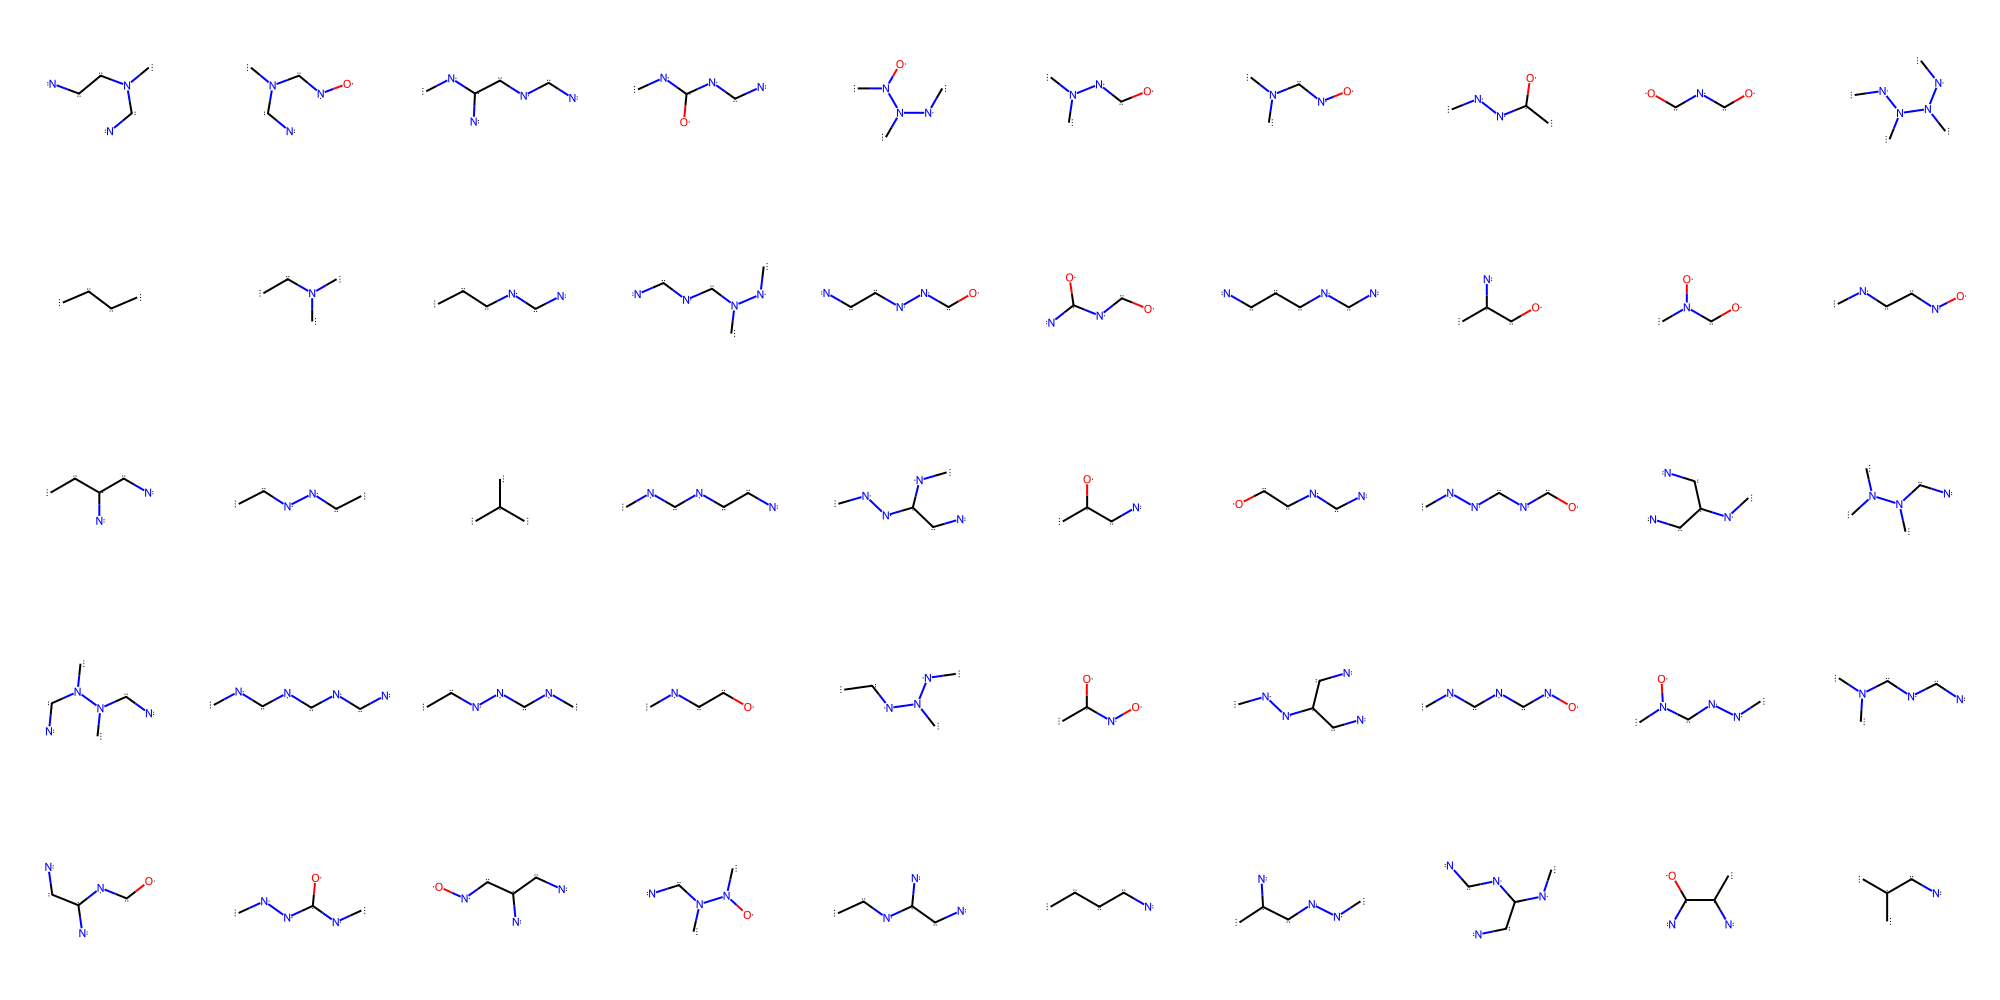

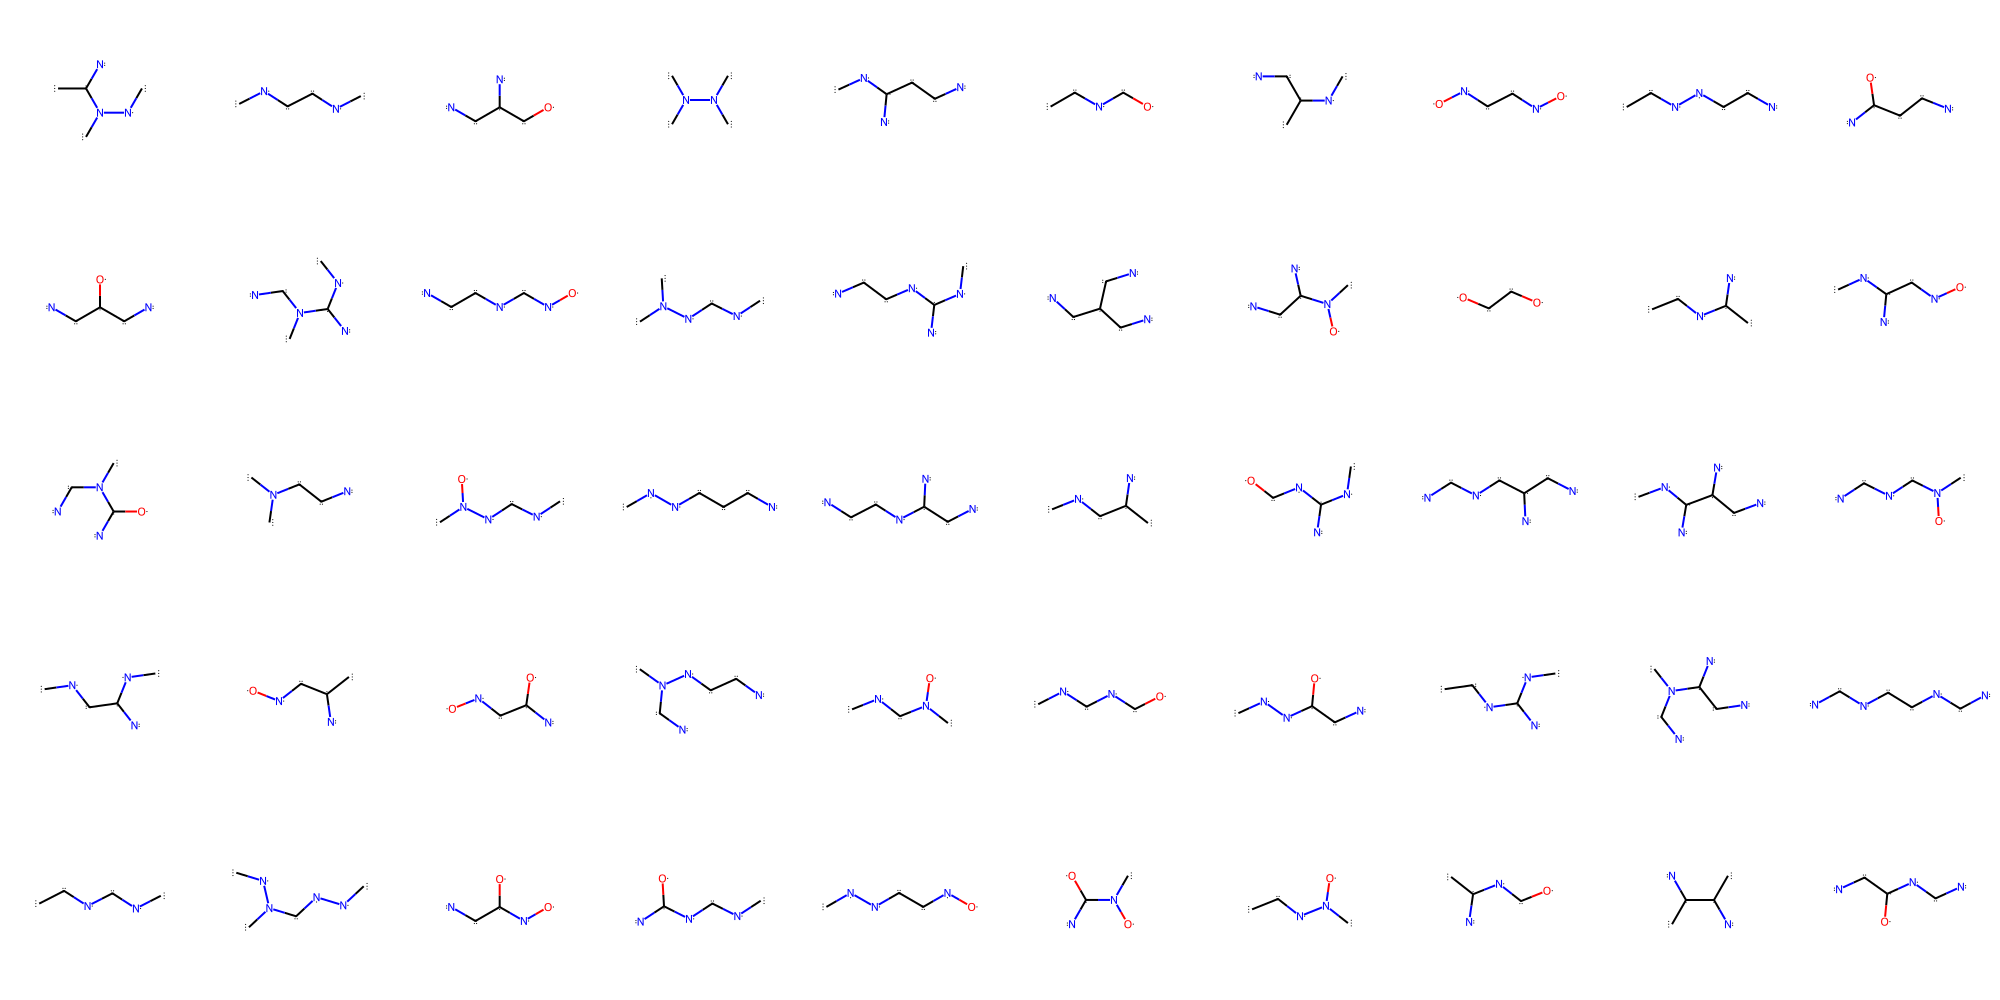

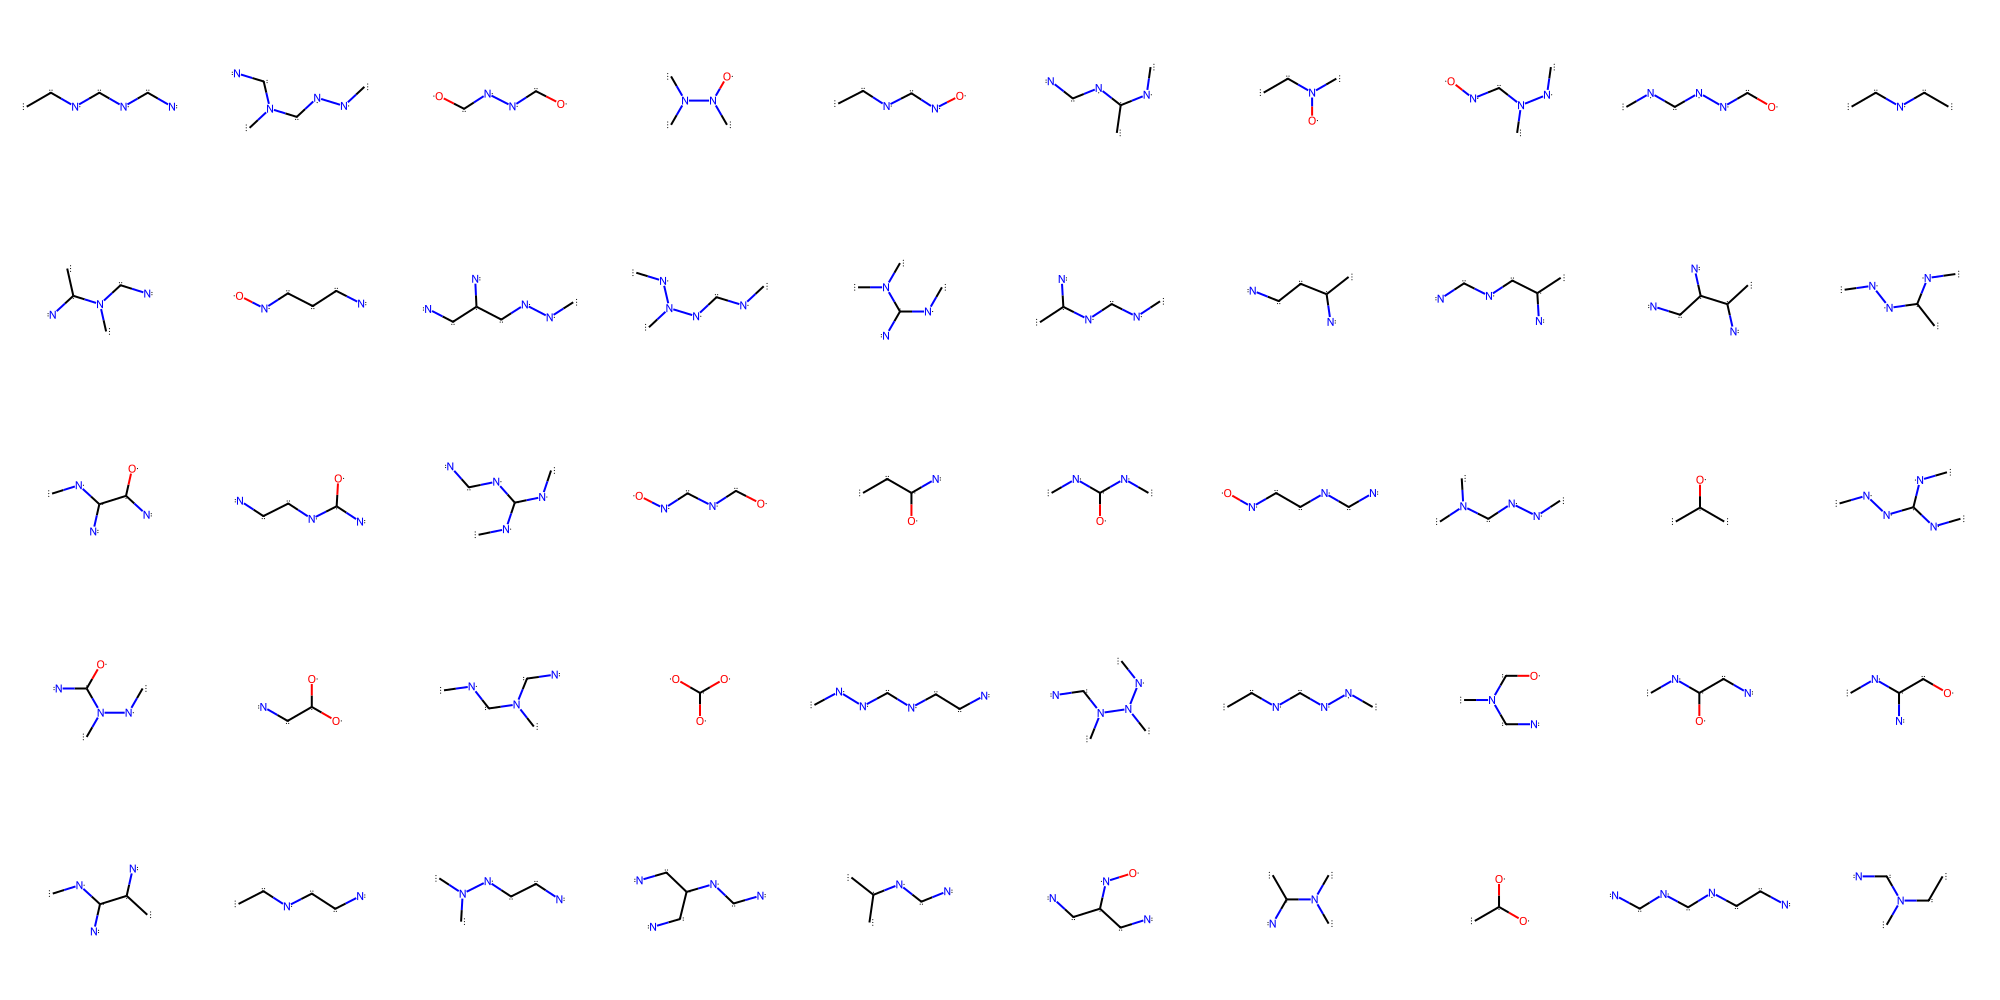

[12:36:55] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-39/rdkit/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78


In [9]:
mols = []
unique_mols = list(unique_mols)
# row = []
for i in range(10):
    mols = []
    for m in unique_mols[i*80:(i+1)*80]:
        mols.append(Chem.MolFromSmiles(m))
    display(rdkit.Chem.Draw.MolsToGridImage(mols, molsPerRow=10))
    plt.show()

################## Only with K
# mols = []
# unique_mols = list(unique_mols)
# only_with_k = []
# for m in unique_mols:
#     mol = Chem.MolFromSmiles(m)
#     atoms = mol.GetAtoms()
#     if 'K' in [atom.GetSymbol() for atom in atoms]:
#         only_with_k.append(m)
# for i in range(10):
#     mols = []
#     for m in only_with_k[i*80:(i+1)*80]:
#         mols.append(Chem.MolFromSmiles(m))
#     display(rdkit.Chem.Draw.MolsToGridImage(mols, molsPerRow=10))
#     plt.show()

In [50]:
with open('group_graphs_k.txt', 'w') as f:
    for m in unique_mols:
        f.write(m + '\n')

In [51]:
num = 0
with open('group_graphs_k.txt', 'r') as f:
    lines = f.readlines()
    unique_mols = [line.strip() for line in lines]
for m in unique_mols:
    mol = Chem.MolFromSmiles(m)
    atoms = mol.GetAtoms()
    if 'K' in [atom.GetSymbol() for atom in atoms]:
        num += 1
print(num)

1216


In [62]:
mols = []
with open('group_graphs_k.txt', 'r') as f:
    lines = f.readlines()

for l in lines:
    mols.append(l.strip())

count = 0
mols_k = []
for m in mols:
    if m.count('K') == 1:
        mols_k.append(m)
        count += 1
with open('group_graphs_k.txt', 'w') as f:
    for m in mols_k:
        f.write(m + '\n')

In [57]:
from genGrouper.post_process import substitute_chiral_smiles
count = 0
mols_k_chiral = []
for s in mols_k:
    mols_k_chiral.extend(substitute_chiral_smiles(s, '[C]=[C]', '/[C]=[C]\\'))
print(len(mols_k_chiral))

2655


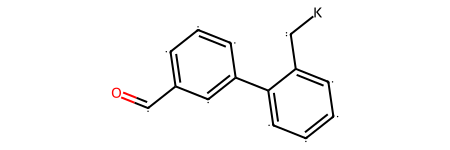

In [72]:
Chem.MolFromSmiles('O=[C]c1[c][c][c]c(-c2[c][c][c][c]c2[C][K])[c]1')

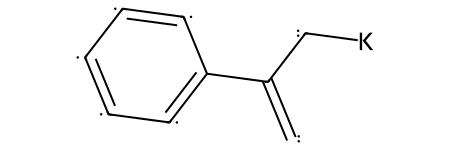

In [68]:
Chem.MolFromSmiles('[C]=C([C][K])c1[c][c][c][c][c]1')

In [58]:
with open('swtichables_smiles_k_chiral_4_nodes.txt', 'w') as f:
    for m in mols_k_chiral:
        f.write(m + '\n')

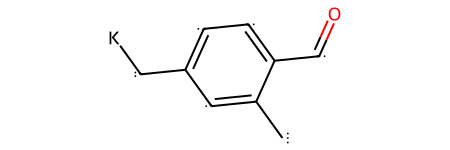

[C]c1[c]c([C][K])[c][c]c1[C]=O


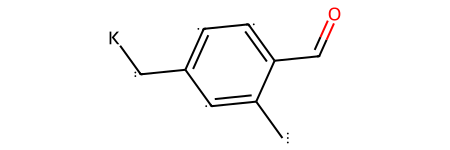

In [34]:
display(Chem.MolFromSmiles(mols_k[6]))
print(mols_k[6])
display(Chem.MolFromSmiles('[C]c1[c]c([C][K])[c][c]c1[C]=O'))